In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file in the form of dataframe
stroke=pd.read_csv("https://raw.githubusercontent.com/yatharth0512-iitj/Stroke-Prediction/main/healthcare-dataset-stroke-data-version-3.csv")
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_group,BMI_class,glucose_class,work_type_Govt_job,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,4,1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,61.0,0,0,202.21,28.1,1,4,3,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,4,1,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,3,1,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,4,0,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

# input features
X = stroke.drop(['stroke'], axis=1)

# Output Label
y = stroke['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, stratify=y)


print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("y_train: \n",y_train.value_counts())
print("y_test: \n",y_test.value_counts())

X_train: (3577, 22)
X_test: (1533, 22)
y_train: 
 stroke
0    3403
1     174
Name: count, dtype: int64
y_test: 
 stroke
0    1458
1      75
Name: count, dtype: int64


[ True  True False  True  True  True  True False False False  True False
 False False  True False  True False False False False  True]
[ 1  1  3  1  1  1  1  2 11 13  1  5 10  4  1  8  1  9 12  6  7  1]


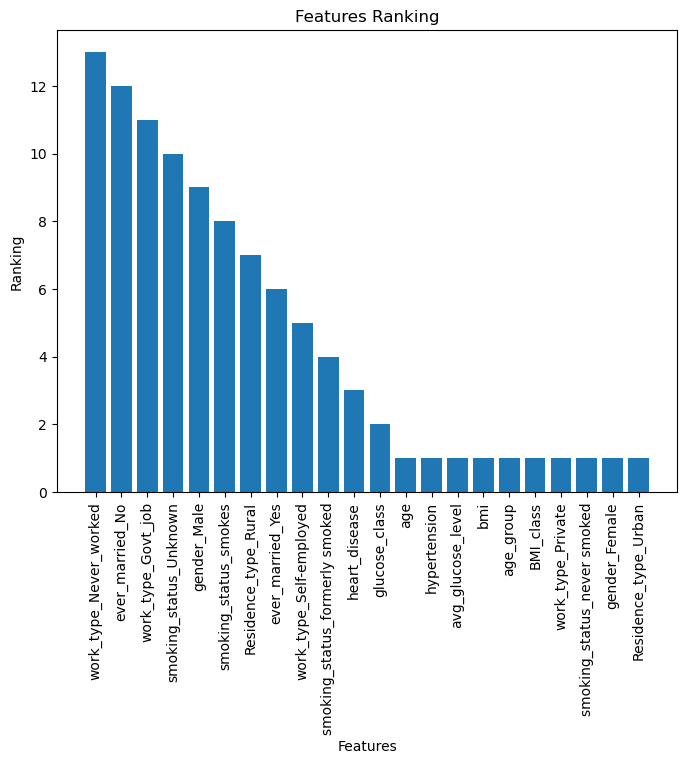

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# create Decision Tree object
rf = RandomForestClassifier(random_state=42)

# create RFE model and select top 10 features
rfe = RFE(rf, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

# sort the ranking in descending order
ranked_cols = sorted(zip(X_train.columns, rfe.ranking_), key=lambda x: x[1], reverse=True)

# visualize the selected features
plt.figure(figsize=(8,6))
plt.title("Features Ranking")
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.bar(range(len(rfe.ranking_)), [ranked_col[1] for ranked_col in ranked_cols])
plt.xticks(range(len(rfe.ranking_)), [ranked_col[0] for ranked_col in ranked_cols], rotation=90)
plt.show()

In [5]:
# transform the data using the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [6]:
# Putting the data into similar scale using the standardisation method

from sklearn.preprocessing import StandardScaler

# Instantiate the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)

In [7]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Train the model with the best hyperparameters
rfc_best = RandomForestClassifier(criterion='entropy', max_depth=None, max_features='log2',
                              min_samples_split=2, n_estimators=100)
rfc_best.fit(X_train_scaled, y_train)

# Function to get user input for various features
def get_user_input():
    print("Please enter the following details for stroke prediction:")
    age = float(input("Age (in years): "))
    hypertension = int(input("Hypertension (0 if No, 1 if Yes): "))
    heart_disease = int(input("Heart Disease (0 if No, 1 if Yes): "))
    avg_glucose_level = float(input("Average Glucose Level (in mg/dL): "))
    bmi = float(input("BMI (Body Mass Index): "))
    gender = input("Gender (Male/Female/Other): ").lower()
    gender = {'male': 1, 'female': 0, 'other': 2}.get(gender, 2)  # Convert to numerical value
    ever_married = input("Ever Married (Yes/No): ").lower()
    ever_married = {'yes': 1, 'no': 0}.get(ever_married, 0)  # Convert to numerical value
    work_type = input("Work Type (Private/Self-employed/Govt_job/Never_worked): ").lower()
    work_type = {'private': 0, 'self-employed': 1, 'govt_job': 2, 'never_worked': 3}.get(work_type, 0)  # Convert to numerical value
    residence_type = input("Residence Type (Urban/Rural): ").lower()
    residence_type = {'urban': 0, 'rural': 1}.get(residence_type, 1)  # Convert to numerical value
    smoking_status = input("Smoking Status (formerly smoked/never smoked/smokes/Unknown): ").lower()
    smoking_status = {'formerly smoked': 1, 'never smoked': 0, 'smokes': 1, 'unknown': 0}.get(smoking_status, 0)  # Convert to numerical value
    return np.array([[age, hypertension, heart_disease, avg_glucose_level, bmi, gender,
                      ever_married, work_type, residence_type, smoking_status]])

# Get user input
user_data = get_user_input()

# Predict whether the user is likely to have a stroke
prediction = rfc_best.predict(user_data)
if prediction[0] == 1:
    print("Based on the provided information, you are predicted to have a stroke.")
else:
    print("Based on the provided information, you are predicted not to have a stroke.")


Please enter the following details for stroke prediction:
Age (in years): 19
Hypertension (0 if No, 1 if Yes): 0
Heart Disease (0 if No, 1 if Yes): 0
Average Glucose Level (in mg/dL): 90
BMI (Body Mass Index): 19
Gender (Male/Female/Other): Male
Ever Married (Yes/No): No
Work Type (Private/Self-employed/Govt_job/Never_worked): Never_worked
Residence Type (Urban/Rural): Urban
Smoking Status (formerly smoked/never smoked/smokes/Unknown): never smoked
Based on the provided information, you are predicted not to have a stroke.
